<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Homework_week9/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 11s 0us/step


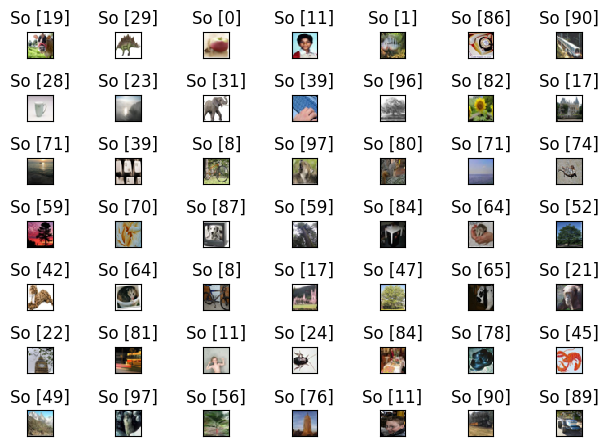

In [3]:
for i in range(49):
  plt.subplot(7, 7, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)


In [21]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name="Layer_1"))
model.add(Dense(256,input_shape = (32*32*3,), activation='relu', name="Layer_2"))
model.add(Dense(128,input_shape = (32*32*3,), activation='relu', name="Layer_3"))
model.add(Dense(64,input_shape = (32*32*3,), activation='relu', name="Layer_4"))
model.add(Dense(32,input_shape = (32*32*3,), activation='relu', name="Layer_5"))
model.add(Dense(100,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Layer_4 (Dense)             (None, 64)                8256      
                                                                 
 Layer_5 (Dense)             (None, 32)                2080      
                                                                 
 Output_layer (Dense)        (None, 100)               3300      
                                                                 
Total params: 1,751,236
Trainable params: 1,751,236
No

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=10, batch_size= 128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 18s 45ms/step - loss: 4.6056 - accuracy: 0.0089 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/10
391/391 [==============================] - 16s 42ms/step - loss: 4.6056 - accuracy: 0.0092 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/10
391/391 [==============================] - 16s 40ms/step - loss: 4.6056 - accuracy: 0.0089 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/10
391/391 [==============================] - 15s 40ms/step - loss: 4.6056 - accuracy: 0.0090 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/10
391/391 [==============================] - 16s 40ms/step - loss: 4.6056 - accuracy: 0.0085 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 6/10
391/391 [==============================] - 17s 43ms/step - loss: 4.6056 - accuracy: 0.0090 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 4.6056 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy:

1/1 [==============================] - 0s 198ms/step


array([30])

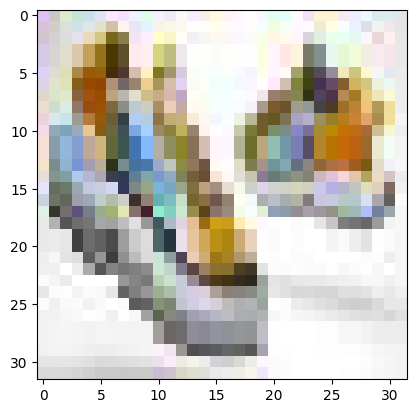

In [26]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt


img = load_img('shoe.jpg', target_size = (32,32))

plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)